# `Seaborn` Chart Styles 🦚

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from IPython.display import Markdown, display
from datetime import datetime

### 🎨 Custom `seaborn` palette

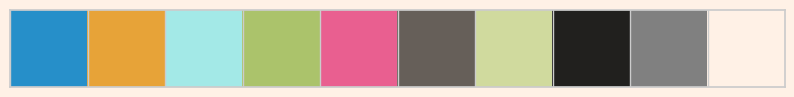

In [159]:
# Custom palette courtesy of FT graphics
custom_palette = ['#268fc9',  # blue
                  '#e7a338',  # yellow
                  '#a3e9e7',  # light blue
                  '#abc36b',  # green
                  '#e95f90',  # pink
                  '#665f59',  # brown
                  '#d0da9e',  # light green
                  '#21201e',  # off black
                  '#808080',  # label darker grey
                  '#fff1e6']  # background colour

#  ⟶ ───► ─── ━━━

sns.set_palette(custom_palette)
display(Markdown("### 🎨 Custom `seaborn` palette"))
sns.palplot(sns.color_palette())

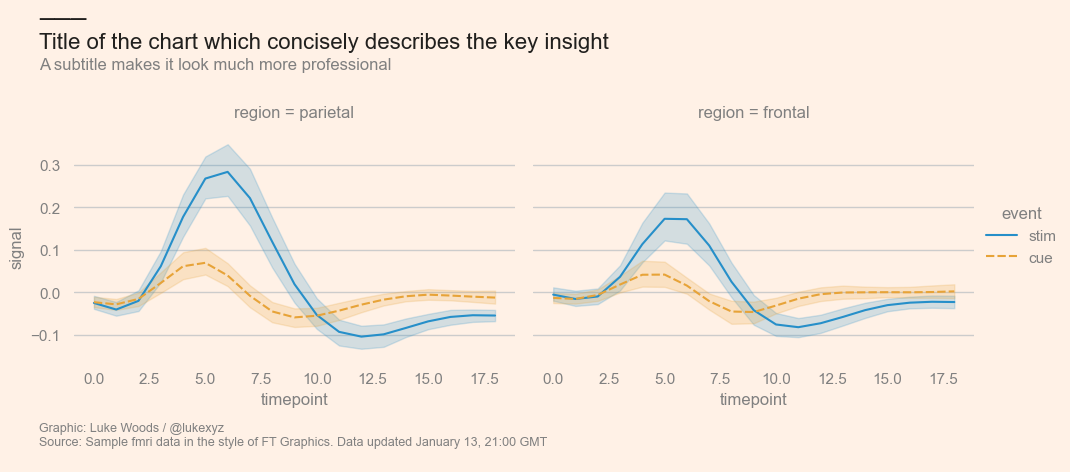

In [203]:
fmri = sns.load_dataset("fmri")

sns.set() # reset
sns.set_palette(custom_palette)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12  # Larger font size
plt.rcParams['font.family'] = 'sans-serif'  # Use 'sans-serif' family
plt.rcParams['font.sans-serif'] = ['Arial', 'Open Sans']  # Use 'Arial' as the first choice
plt.rcParams['text.color'] = '#808080'  # Gray color for all text
plt.rcParams['axes.labelcolor'] = '#808080'  # Gray color for x/y labels
plt.rcParams['axes.titlesize'] = 40  # Larger font size for the plot title
plt.rcParams['axes.titleweight'] = 300  # Bold font weight for plot title
plt.rcParams['axes.titlepad'] = 12  # Spacing between plot title and plot
plt.rcParams['xtick.color'] = '#808080'
plt.rcParams['ytick.color'] = '#808080'
plt.rcParams['figure.facecolor'] = '#fff1e6'
plt.rcParams['axes.facecolor'] = '#fff1e6'

g = sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

for ax in g.axes.flat:
    ax.grid(False, axis='x')  # This removes the vertical gridlines
sns.despine(left=True, bottom=True)

# Add titles 
g.fig.suptitle(x=0.05, y=0.95, t='───\nTitle of the chart which concisely describes the key insight', fontsize=16, color='#21201e', ha='left')
g.fig.text(x=0.05, y=0.83, s='A subtitle makes it look much more professional', fontsize=12, color='#808080', ha='left')

# Metadata text with current date and time
current_datetime = datetime.now().strftime("%B %d, %H:00 GMT")
metadata_text = f"Graphic: Luke Woods / @lukexyz \nSource: Sample fmri data in the style of FT Graphics. Data updated {current_datetime} \n"
g.fig.text(x=0.05, y=0.05, s=metadata_text, fontsize=9, color='grey', ha='left')

plt.subplots_adjust(top=0.7, bottom=0.25)  # Increase the value to add more padding
plt.show()

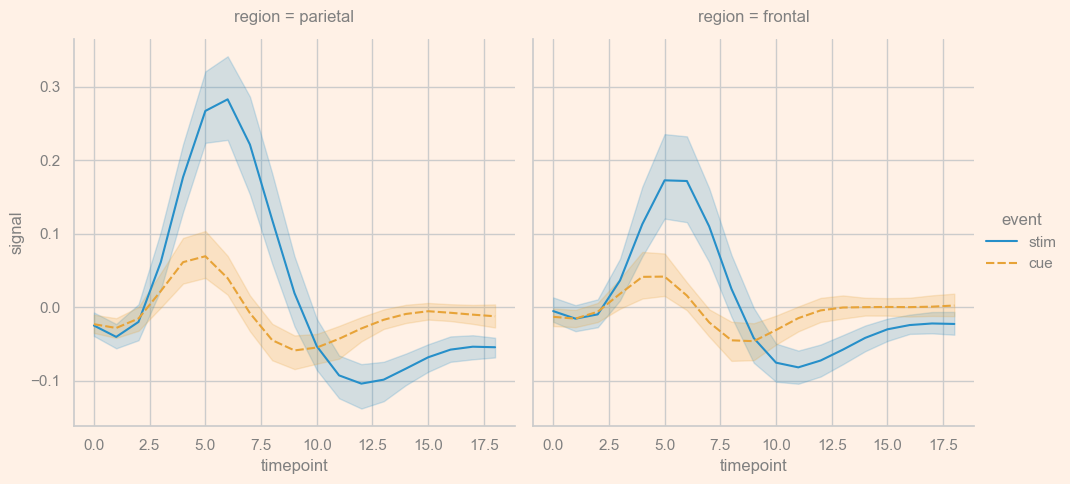

In [77]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
);

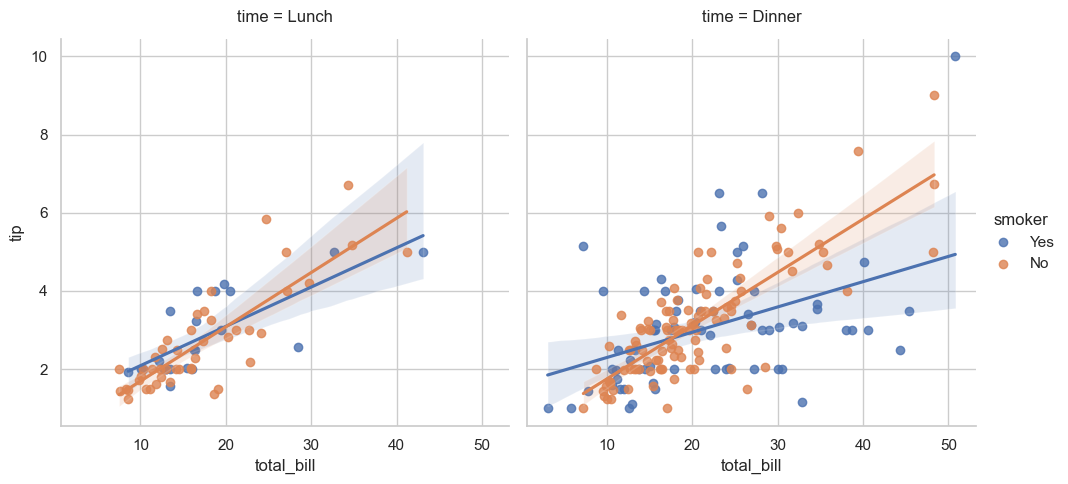

In [208]:
sns.set() # reset
sns.set_style("whitegrid")
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

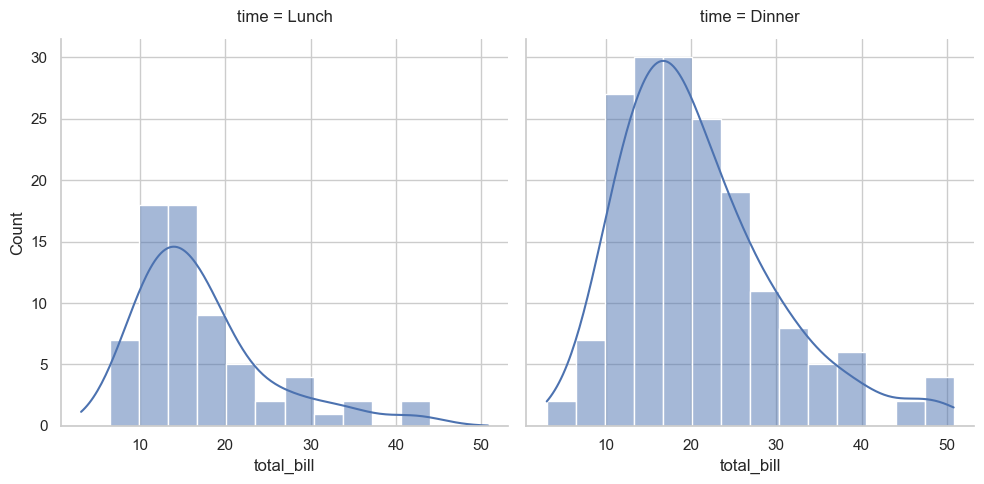

In [210]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

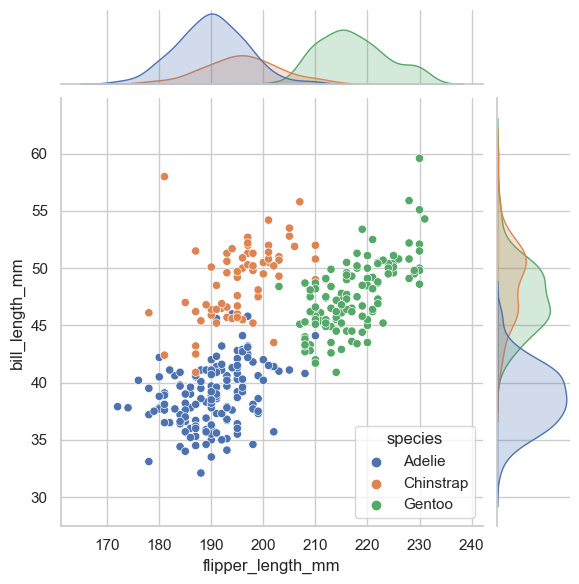

In [211]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")